In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

datadir = '/Users/schwarz/Documents/projects/element/research/rto_nime22/user_data/'

# array [participants] of array [fam, exp] data file name
datafile =  [ ['P1/2022-07-28T15-09-33.830Z.txt', 'P1/2022-07-28T15-10-29.580Z.txt' ],
              ['P2/2022-08-30T16-37-21.326Z.txt', 'P2/2022-08-30T16-38-30.262Z.txt' ],
              ['P3/2022-09-01T17-04-31.275Z.txt', 'P3/2022-09-01T17-07-04.283Z.txt' ],
              ['P4/2022-09-02T12-19-35.310Z.txt', 'P4/2022-09-02T12-21-02.022Z.txt' ]
            ]

In [32]:
# new load method
participant = 1
res0, seg0 = read_log(datadir + datafile[participant - 1][0])
res,  seg  = read_log(datadir + datafile[participant - 1][1])
seg0 = pd.DataFrame(seg0)
seg  = pd.DataFrame(seg)
seg

0 {'logtype': 'event', 'timestamp0': 228139, 'event': ['Familiarization']}
0 {'logtype': 'event', 'timestamp0': 283892, 'event': ['Start Condition 1']}
25635 {'logtype': 'event', 'timestamp0': 643893, 'event': ['timer zero']}
25637 {'logtype': 'event', 'timestamp0': 686345, 'event': ['Start Condition 2']}
54854 {'logtype': 'event', 'timestamp0': 1046371, 'event': ['timer zero']}


,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,2389.314165,31,0,2070.426888,0,0.000000,0.000000,2070.548560,0.000000,False,segment,0.839,c1
1,2580.995908,20,1,2261.270235,1,30.468331,1.194837,2262.147681,0.597418,2,segment,0.343,c1
2,2759.955577,17,2,2440.205404,2,8.206772,0.443609,2440.863569,0.546149,0.81225,segment,0.529,c1
3,3033.429436,27,3,2713.710510,3,10.186304,0.433460,2716.332614,0.517976,0.836833,segment,0.281,c1
4,3221.122196,20,4,2901.463014,2,4.704878,0.254318,2903.000634,0.465245,0.546632,segment,0.715,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,760760.238072,13,1964,760486.148165,1964,12.769495,0.912107,760583.520455,0.517480,1.76259,segment,-99.000,c2
1850,761585.100414,23,1965,761265.338331,1916,3.972565,0.184770,761453.107186,0.517300,0.357183,segment,-99.000,c2
1851,762123.447069,55,1966,761803.747557,1966,15.663725,0.360086,762235.957052,0.517215,0.696201,segment,-99.000,c2
1852,762471.979326,33,1967,762236.094506,1967,11.851260,0.395042,762490.998054,0.517149,0.763884,segment,-99.000,c2


<AxesSubplot:>

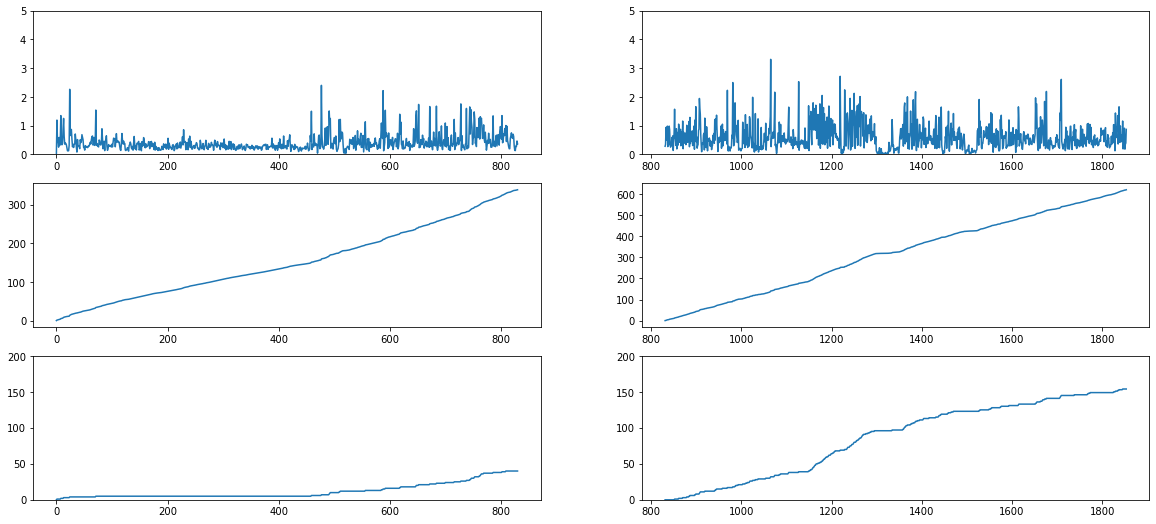

In [35]:
nov0 = select(seg0, condition='c0')
nov1 = select(seg, condition='c1')
nov2 = select(seg, condition='c2')

#ymax = max((nov1['min_dtw_pond'] > 1).cumsum(), (nov2['min_dtw_pond'] > 1).cumsum())
ymax = 200
thresh = 1

plt.figure(figsize=(20, 9)) 
plt.subplot(3, 2, 1)
nov1['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(3, 2, 2)
nov2['min_dtw_pond'].plot(ylim=(0, 5))

plt.subplot(3, 2, 3)
nov1['min_dtw_pond'].cumsum().plot()
plt.subplot(3, 2, 4)
nov2['min_dtw_pond'].cumsum().plot()

plt.subplot(3, 2, 5)
(nov1['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax))
plt.subplot(3, 2, 6)
(nov2['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax))

(array([ 52.,  85., 126., 130., 112., 115.,  82.,  62.,  62.,  43.,  29.,
         19.,  23.,  21.,  14.,   7.,  12.,   7.,   3.,   5.,   3.,   4.,
          2.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

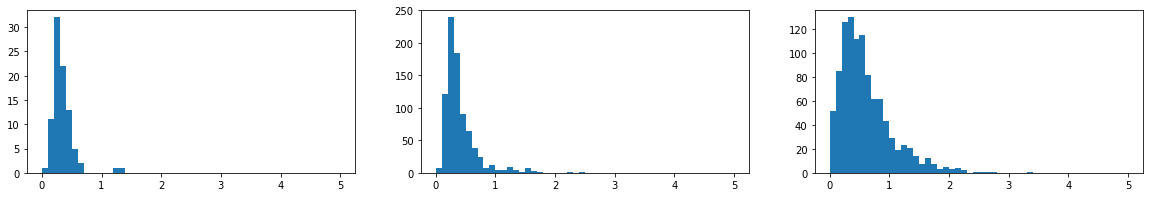

In [34]:
plt.figure(figsize=(20, 3)) 
plt.subplot(1, 3, 1)
plt.hist(nov0['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 2)
plt.hist(nov1['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 3)
plt.hist(nov2['min_dtw_pond'], 50, range=(0, 5))